In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [32]:
ex = Dataset('ex.nc')
ts = Dataset('ts.nc')
geo = Dataset('geology.nc')

In [3]:
ex.variables.keys()

dict_keys(['time', 'y', 'x', 'topg', 'usurf', 'thk', 'smb', 'velbar_mag', 'velsurf_mag', 'divflux', 'uvelsurf', 'vvelsurf', 'uvelbase', 'vvelbase'])

In [4]:
ts.variables.keys()

dict_keys(['time', 'vol', 'area'])

In [33]:
geo.variables.keys()

dict_keys(['y', 'x', 'thkobs', 'usurfobs', 'uvelsurfobs', 'vvelsurfobs', 'icemaskobs', 'strflowctrl', 'arrhenius', 'slidingco', 'thk', 'usurf', 'icemask'])

Text(0.5, 0, 'Year of simulation')

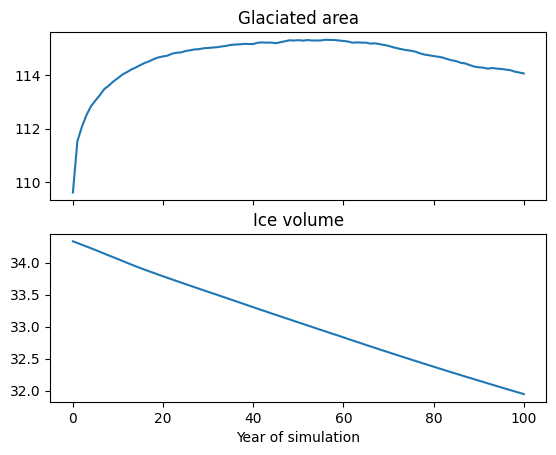

In [5]:
fig, ax = plt.subplots(2, 1, sharex = True)
years = np.arange(0, 101, 1)

ax[0].plot(years, ts['area'][:])
ax[1].plot(years, ts['vol'][:])

ax[0].set_title('Glaciated area')
ax[1].set_title('Ice volume')
ax[1].set_xlabel('Year of simulation')

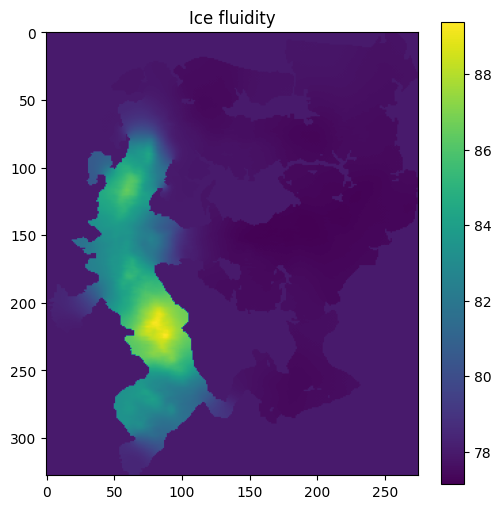

In [42]:
fig, ax = plt.subplots(figsize = (6, 6))

im = ax.imshow(geo.variables['strflowctrl'])

plt.title('Ice fluidity')
plt.colorbar(im)
plt.show()

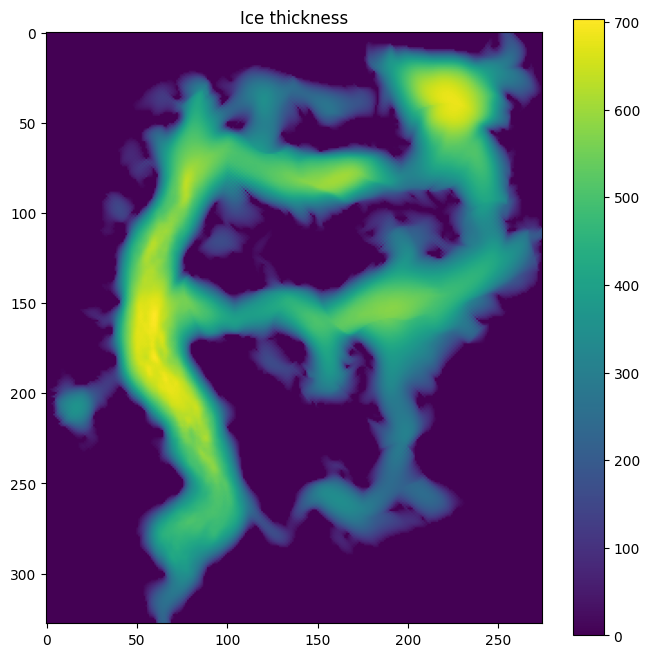

In [12]:
fig, ax = plt.subplots(figsize = (8, 8))

im = ax.imshow(ex.variables['thk'][0])

plt.title('Ice thickness')
plt.colorbar(im)
plt.show()

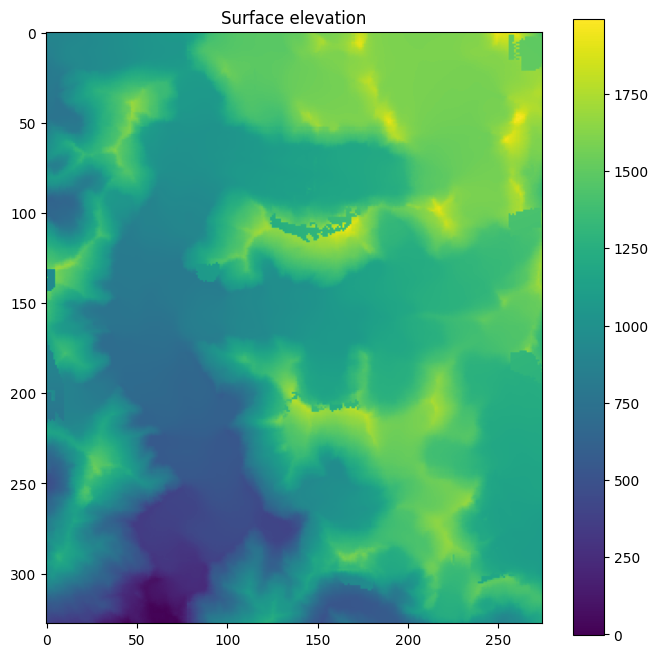

In [20]:
fig, ax = plt.subplots(figsize = (8, 8))

im = ax.imshow(ex.variables['usurf'][0])

plt.title('Surface elevation')
plt.colorbar(im)
plt.show()

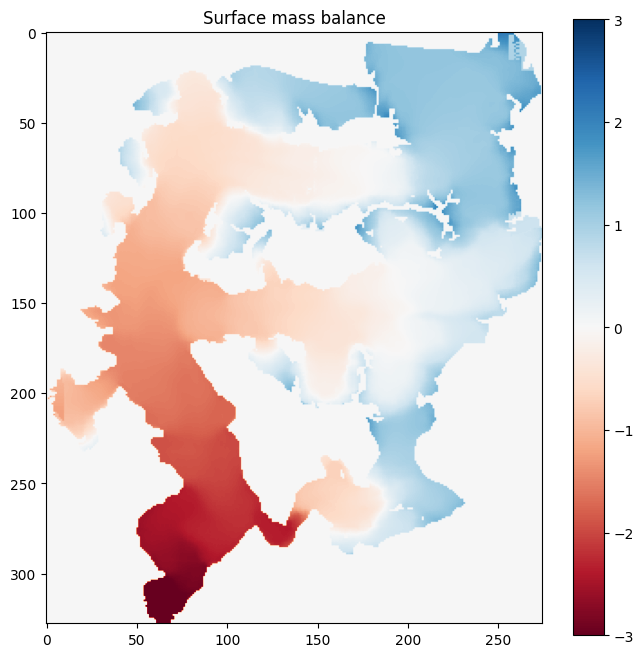

In [29]:
fig, ax = plt.subplots(figsize = (8, 8))

im = ax.imshow(ex.variables['smb'][0], cmap = 'RdBu', vmin = -3, vmax = 3)

plt.title('Surface mass balance')
plt.colorbar(im)
plt.show()

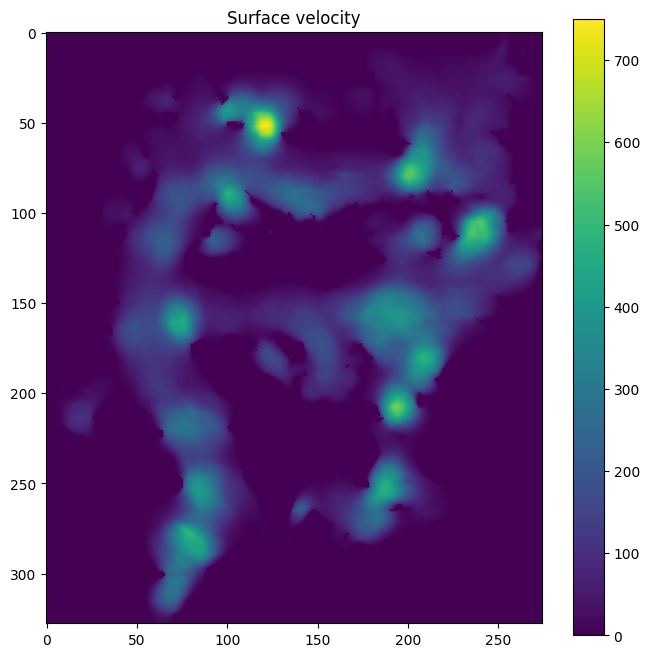

In [31]:
fig, ax = plt.subplots(figsize = (8, 8))

im = ax.imshow(ex.variables['velsurf_mag'][0])

plt.title('Surface velocity')
plt.colorbar(im)
plt.show()

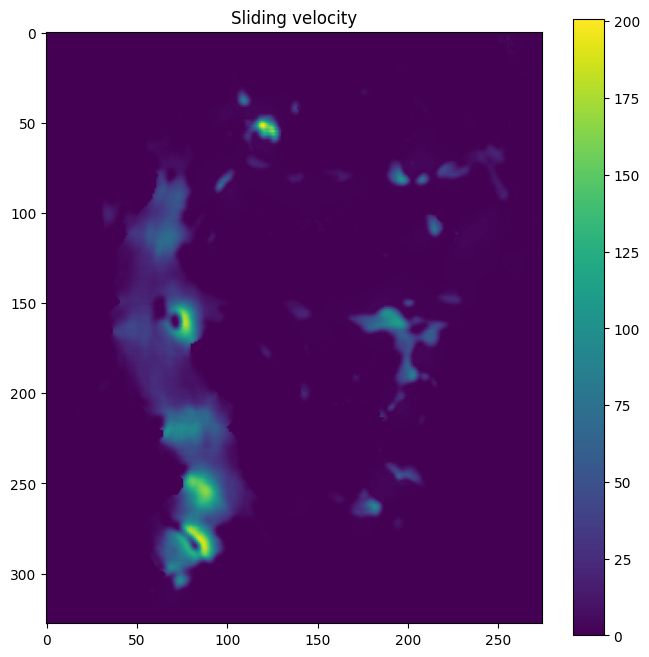

In [19]:
fig, ax = plt.subplots(figsize = (8, 8))

t = 0
velbase = np.sqrt(ex.variables['uvelbase'][t]**2 + ex.variables['vvelbase'][t]**2)

im = ax.imshow(velbase)

plt.title('Sliding velocity')
plt.colorbar(im)
plt.show()

In [10]:
from matplotlib.animation import FuncAnimation

MovieWriter ffmpeg unavailable; using Pillow instead.


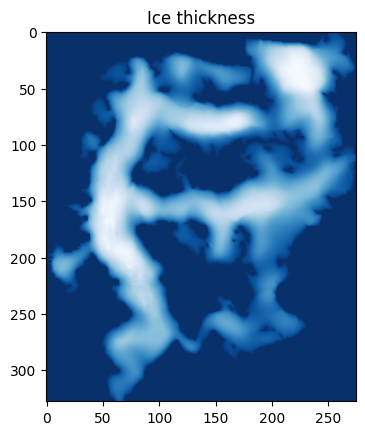

In [16]:
fig, ax = plt.subplots()

im = plt.imshow(ex['thk'][0], cmap = 'Blues_r')

def animate(t):
    im.set_array(ex['thk'][t])
    return im

anim = FuncAnimation(fig, animate, frames = 20, interval = 100)
ax.set_title('Ice thickness')
    
anim.save('./outputs/thickness.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


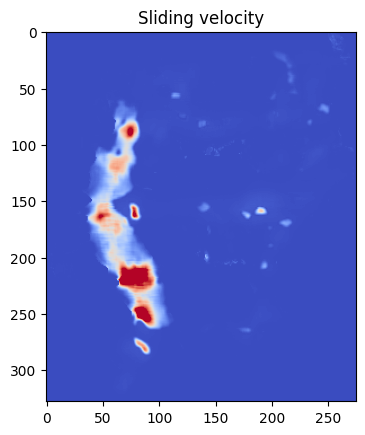

In [20]:
fig, ax = plt.subplots()

im = plt.imshow(np.sqrt(ex['uvelbase'][0]**2 + ex['vvelbase'][0]**2), cmap = 'coolwarm', vmax = 50)

def animate(t):
    im.set_array(np.sqrt(ex['uvelbase'][t]**2 + ex['vvelbase'][t]**2))
    return im

anim = FuncAnimation(fig, animate, frames = 20, interval = 200)
ax.set_title('Sliding velocity')
    
anim.save('./outputs/sliding.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


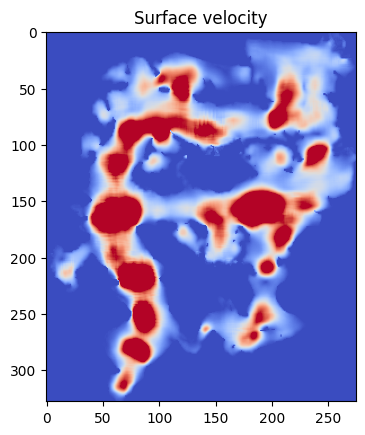

In [21]:
fig, ax = plt.subplots()

im = plt.imshow(np.sqrt(ex['uvelsurf'][0]**2 + ex['vvelsurf'][0]**2), cmap = 'coolwarm', vmax = 80)

def animate(t):
    im.set_array(np.sqrt(ex['uvelsurf'][t]**2 + ex['vvelsurf'][t]**2))
    return im

anim = FuncAnimation(fig, animate, frames = 20, interval = 200)
ax.set_title('Surface velocity')
    
anim.save('./outputs/surface.gif')

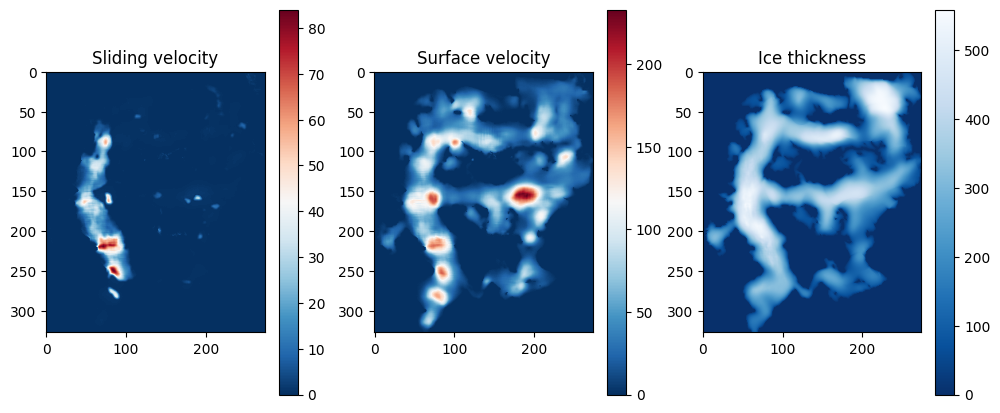

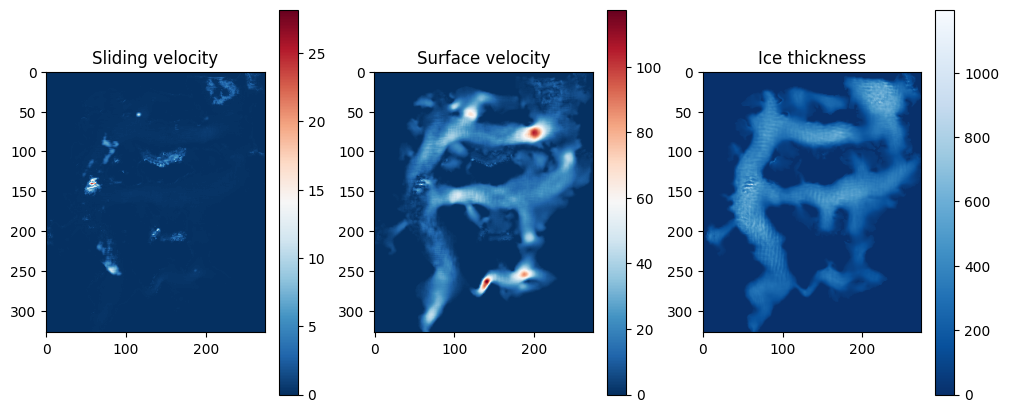

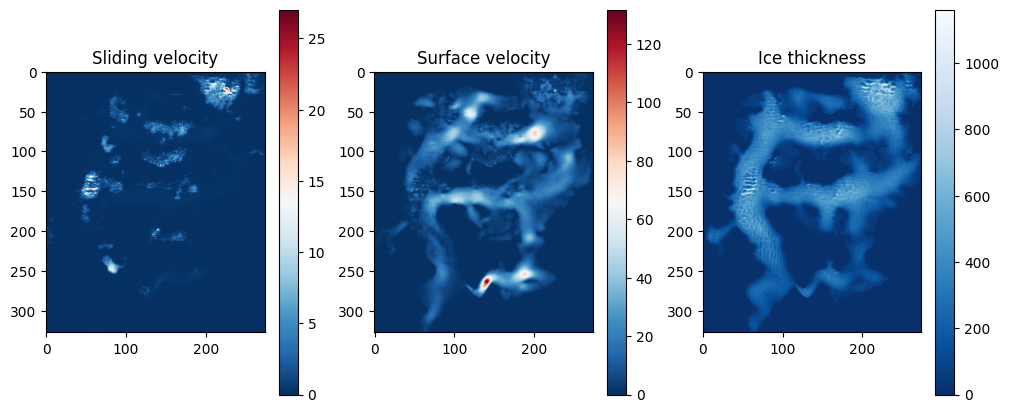

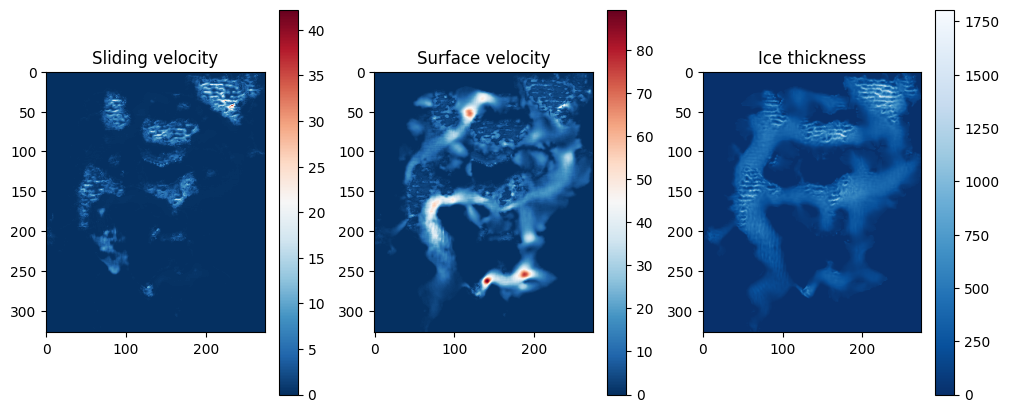

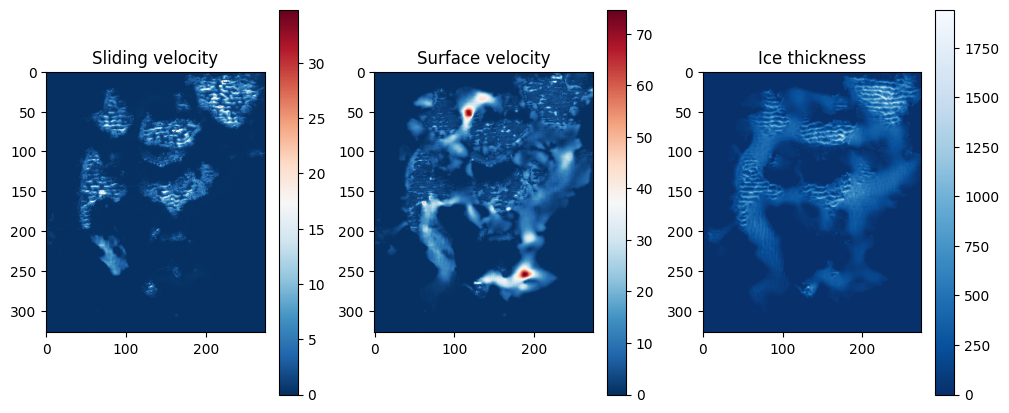

In [6]:
ub = np.sqrt(ex['vvelbase'][:]**2 + ex['uvelbase'][:]**2)

for i in range(ub.shape[0]):
    if i % 5 == 0:
        fig, ax = plt.subplots(1, 3, figsize = (12, 5))
        im0 = ax[0].imshow(ub[i,:,:], cmap = 'RdBu_r')
        plt.colorbar(im0)
        im1 = ax[1].imshow(ex['velsurf_mag'][i,:,:], cmap = 'RdBu_r')
        plt.colorbar(im1)
        im2 = ax[2].imshow(ex['thk'][i,:,:], cmap = 'Blues_r')
        plt.colorbar(im2)
        
        ax[0].set_title('Sliding velocity')
        ax[1].set_title('Surface velocity')
        ax[2].set_title('Ice thickness')
    
plt.show()